### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.


### Steps:-

The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [235]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA(Exploratory Data Analysis)

### Reading and understanding the Data

In [2]:
# Reading the Dataset

creditcard = pd.read_csv(r'F:\Imarticus\Datasets\credit fraud\creditcard.csv')

In [58]:
creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard.shape

(284807, 31)

In [6]:
# Checking if any column is in the object type format

creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no object type columns in the dataset, so we are good to go ahead.

In [239]:
# Checking for missing valus in the dataset

creditcard.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

In [8]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking the distribution of the classes

In [9]:
classes = creditcard.Class.value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [10]:
normal_tran = round(classes[0]*100/creditcard['Class'].count(),2)
normal_tran

99.83

In [11]:
Fraud_tran = round(classes[1]*100/creditcard['Class'].count(),2)
Fraud_tran

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

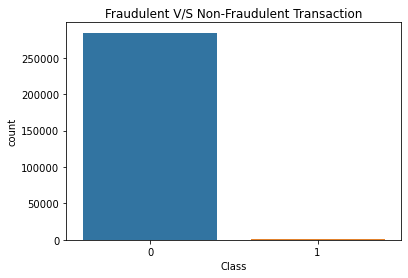

In [15]:
# Bar plot for the number of fraudulent vs non-fraudulent transactions

sns.countplot(x='Class', data = creditcard)
plt.title('Fraudulent V/S Non-Fraudulent Transaction')
plt.show()

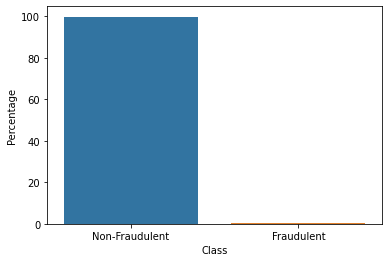

In [22]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations

fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_tran, Fraud_tran]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.show()

## Observe the distribution of classes with time

In [23]:
# Creating fraudulent dataframe
fraud = creditcard[creditcard['Class'] == 1]

# Creating non fraudulent dataframe
non_fraud = creditcard[creditcard['Class'] == 0]

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


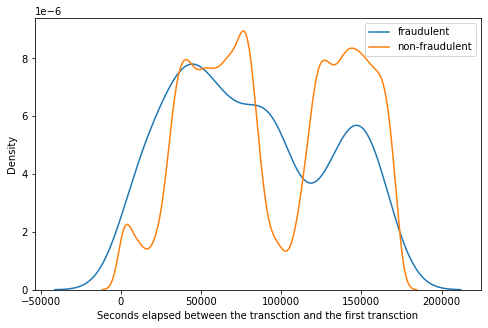

In [241]:
# distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],hist=False)
ax = sns.distplot(non_fraud['Time'],hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(['fraudulent', 'non-fraudulent'])
plt.show();

### Analysis -
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [29]:
# Dropping the Time column
creditcard.drop('Time', axis=1, inplace=True)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


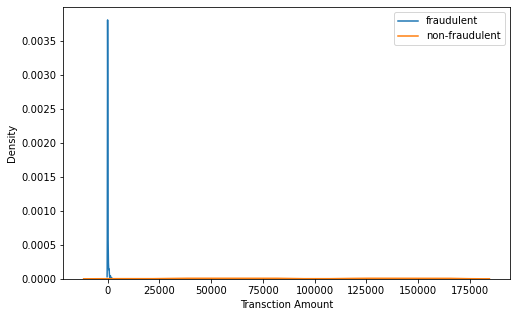

In [40]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],hist=False)
ax = sns.distplot(non_fraud['Time'],hist=False)
ax.set(xlabel='Transction Amount')
plt.legend(['fraudulent', 'non-fraudulent'])
plt.show()

### Analysis-
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

In [59]:
# feature data (predictors)
X = creditcard.iloc[:, :-1]

# label class
Y = creditcard['Class']

## Feature Scaling
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaled_X = scaler.fit_transform(X)

In [66]:
scaled_X = pd.DataFrame(scaled_X)
scaled_X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


## Train-Test Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Partition data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=42)

### Training model through Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [90]:
prediction = rfc.predict(X_test)

### Importing Evaluation metrics

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
cm

array([[56861,     3],
       [   21,    77]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
accuracy

0.9995786664794073

In [111]:
from sklearn.metrics import classification_report
creport = classification_report(Y_test, prediction)
print('*****Random Forest Evaluation Metrics*****')
print()
print(creport)

*****Random Forest Evaluation Metrics*****

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy is good but the recall score isn't good enough which is nothing but TPR(True Positive Rate)

### Training model through Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [125]:
prediction_lr = lr.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_lr)
cm

array([[56855,     9],
       [   41,    57]], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction_lr)
accuracy

0.9991222218320986

In [128]:
from sklearn.metrics import classification_report
creport = classification_report(Y_test, prediction_lr)
print('*****Logistic Regression Evaluation Metrics*****')
print()
print(creport)

*****Logistic Regression Evaluation Metrics*****

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy is good but the recall score is so bad here which is nothing but TPR(True Positive Rate)

## Importing SMOTE (Synthetic Minority Over-sampling Technique)

In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [157]:
print(X_train_res.shape)
print(Y_train_res.shape)

(454902, 29)
(454902,)


In [158]:
print('After sampling', 'counts of label 0: {}'.format(sum(Y_train_res == 0)))
print('After sampling', 'counts of label 1: {}'.format(sum(Y_train_res == 1)))

After sampling counts of label 0: 227451
After sampling counts of label 1: 227451


Here we can see after applying SMOTE, both classes are equal now. The dataset is not imbalanced anymore

### Random Forest after Over Sampling

In [159]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train_res, Y_train_res)

RandomForestClassifier()

In [160]:
prediction_rfc1 = rfc1.predict(X_test)

In [161]:
cm = confusion_matrix(Y_test, prediction_rfc1)
cm

array([[56853,    11],
       [   14,    84]], dtype=int64)

In [162]:
accuracy = accuracy_score(Y_test, prediction_rfc1)
accuracy

0.9995611109160493

In [163]:
pred_prob_rfc = rfc1.predict_proba(X_test)
pred_prob_rfc

array([[0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [164]:
creport_rfc1 = classification_report(Y_test, prediction_rfc1) 
print('******Random Forest Evaluation Metrics after oversampling******')
print()
print(creport_rfc1)

******Random Forest Evaluation Metrics after oversampling******

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



We can see improvement here. As recall score has changed here from 0.79 to 0.86

### Logistic Regression after Over Sampling

In [197]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, Y_train_res)

LogisticRegression()

In [198]:
prediction_lr1 = lr1.predict(X_test)

In [199]:
cm = confusion_matrix(Y_test, prediction_lr1)
cm

array([[55394,  1470],
       [    8,    90]], dtype=int64)

In [200]:
accuracy = accuracy_score(Y_test, prediction_lr1)
accuracy

0.9740528773568344

In [201]:
pred_prob_lr = lr1.predict_proba(X_test)
pred_prob_lr

array([[0.        , 1.        ],
       [0.98126782, 0.01873218],
       [0.98388637, 0.01611363],
       ...,
       [0.80277312, 0.19722688],
       [0.98795394, 0.01204606],
       [0.49189759, 0.50810241]])

In [202]:
creport_lr1 = classification_report(Y_test, prediction_lr1) 
print('******Logistic Regression Evaluation Metrics after oversampling******')
print()
print(creport_lr1)

******Logistic Regression Evaluation Metrics after oversampling******

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



Impressive results after applying SMOTE. Recall Score has changed from 0.59 to 0.92

In [203]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [204]:
print('roc_auc score of Random Forest is:', roc_auc_score(Y_test, prediction_rfc1))
print('roc_auc score of Logistic Regression is:', roc_auc_score(Y_test, prediction_lr1))

roc_auc score of Random Forest is: 0.9284747065680522
roc_auc score of Logistic Regression is: 0.9462580966545312


## Conclusion

Here we can see, Logistic Regression has better roc-auc score than Random Forest. So we will go for Logistic Regression algorithm ahead.

In [ ]:
kavp